In [2]:
from bs4 import BeautifulSoup as soup
# from urllib.request import urlopen as uReq 
import requests

In [3]:
url = "https://www.worldometers.info/geography/how-many-countries-are-there-in-the-world/"

In [4]:
# uClient = uReq(url)
# page_html = uClient.read()
# uClient.close()

response = requests.get(url)
print(response)

<Response [200]>


200 means successfully establish the connection.

In [5]:
# countries = soup(response.content,'html5lib')
countries = soup(response.content,'html.parser')
countries


<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--> <html lang="en"> <!--<![endif]--> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=device-width, initial-scale=1" name="viewport"/> <title>How many countries are there in the world? (2022) - Total &amp; List | Worldometer</title><link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/><link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/><link href="/favicon/apple-icon-114x114.png" rel="apple-touch-icon" sizes="114x114"/><link href="/favicon/apple-icon-120x120.png" rel="apple-touch-icon" sizes="120x12

In [7]:
for i in range(8):
  print(countries.select('td')[i].text)

1
Honduras
9,904,607
0.1 %
111,890
2
United Arab Emirates
9,890,402


In [8]:
data = countries.find_all('td')
data

[<td>1</td>,
 <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/honduras-population/">Honduras</a></td>,
 <td style="font-weight: bold;">9,904,607</td>,
 <td>0.1 %</td>,
 <td>111,890</td>,
 <td>2</td>,
 <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/united-arab-emirates-population/">United Arab Emirates</a></td>,
 <td style="font-weight: bold;">9,890,402</td>,
 <td>0.1 %</td>,
 <td>83,600</td>,
 <td>3</td>,
 <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/djibouti-population/">Djibouti</a></td>,
 <td style="font-weight: bold;">988,000</td>,
 <td>0 %</td>,
 <td>23,180</td>,
 <td>4</td>,
 <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/seychelles-population/">Seychelles</a></td>,
 <td style="font-weight: bold;">98,347</td>,
 <td>0 %</td>,
 <td>460</td>,
 <td>5</td>,
 <td style="font-weight: bold; font-size:15px; text-align:

In [9]:
len(data)

975

In [14]:
data_list = []
for x in range(0,len(data),5):
  sr_no = countries.select('td')[x].text
  country = countries.select('td')[x+1].text
  population_2020 = countries.select('td')[x+2].text
  world_share = countries.select('td')[x+3].text
  land_area = countries.select('td')[x+4].text

  data_list.append((sr_no,country,int(population_2020.replace(',','')),float(world_share.replace('%','')),int(land_area.replace(',','')),))

In [15]:
data_list

[('1', 'Honduras', 9904607, 0.1, 111890),
 ('2', 'United Arab Emirates', 9890402, 0.1, 83600),
 ('3', 'Djibouti', 988000, 0.0, 23180),
 ('4', 'Seychelles', 98347, 0.0, 460),
 ('5', 'Antigua and Barbuda', 97929, 0.0, 440),
 ('6', 'Vietnam', 97338579, 1.2, 310070),
 ('7', 'Hungary', 9660351, 0.1, 90530),
 ('8', 'Tajikistan', 9537645, 0.1, 139960),
 ('9', 'Belarus', 9449323, 0.1, 202910),
 ('10', 'Austria', 9006398, 0.1, 82409),
 ('11', 'Fiji', 896445, 0.0, 18270),
 ('12', 'DR Congo', 89561403, 1.1, 2267050),
 ('13', 'Papua New Guinea', 8947024, 0.1, 452860),
 ('14', 'Serbia', 8737371, 0.1, 87460),
 ('15', 'Comoros', 869601, 0.0, 1861),
 ('16', 'Israel', 8655535, 0.1, 21640),
 ('17', 'Switzerland', 8654622, 0.1, 39516),
 ('18', 'Turkey', 84339067, 1.1, 769630),
 ('19', 'Iran', 83992949, 1.1, 1628550),
 ('20', 'Germany', 83783942, 1.1, 348560),
 ('21', 'Togo', 8278724, 0.1, 54390),
 ('22', 'Holy See', 801, 0.0, 0),
 ('23', 'Sierra Leone', 7976983, 0.1, 72180),
 ('24', 'Guyana', 786552, 0.0

## Converting the gather data into Dataframe


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.DataFrame(data_list, columns=['sr_no','country','population(2020)','world_share(%)','land_area_km²'])

In [19]:
df.head()

,sr_no,country,population(2020),world_share(%),land_area_km²
0,1,Honduras,9904607,0.1,111890
1,2,United Arab Emirates,9890402,0.1,83600
2,3,Djibouti,988000,0.0,23180
3,4,Seychelles,98347,0.0,460
4,5,Antigua and Barbuda,97929,0.0,440


In [21]:
df.to_csv('Worldpopulation(2020).csv', index=False)

In [22]:
df.columns

Index(['sr_no', 'country', 'population(2020)', 'world_share(%)',
       'land_area_km²'],
      dtype='object')

In [24]:
df.describe()

,population(2020),world_share(%),land_area_km²
count,1.950000e+02,195.000000,1.950000e+02
mean,3.269519e+07,0.415897,6.627831e+05
std,1.116509e+08,1.434589,1.834234e+06
min,0.000000e+00,0.000000,0.000000e+00
25%,1.927100e+06,0.000000,2.299500e+04
50%,8.655535e+06,0.100000,1.127600e+05
75%,2.806348e+07,0.400000,5.194300e+05
max,1.439324e+09,18.500000,1.637687e+07


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sr_no             195 non-null    object 
 1   country           195 non-null    object 
 2   population(2020)  195 non-null    int64  
 3   world_share(%)    195 non-null    float64
 4   land_area_km²     195 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.7+ KB


# Analyzing the Data

A. Make a Scatter plot by using Seaborn and Matplotlib of 'Population(2020) vs Land_Area_Km²' and apply the following customization.
- Make the Figure size (8,6)
- Make a scatter plot such as x='Population(2020)',y='Land_Area_Km²',palette='Set1'
- Add a title to the Plot with fontsize = 15 and color = purple as 'Population(2020) vs Land_Area_Km²'
- Add Grid to the plot using grid() function
- Also Show the plot

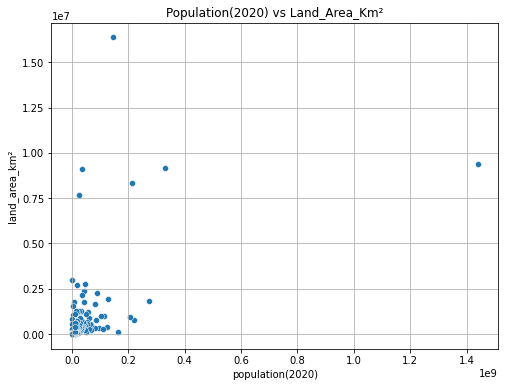

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='population(2020)',y='land_area_km²',palette='Set1')
plt.title('Population(2020) vs Land_Area_Km²')
plt.grid() 
plt.show()

In [33]:
# Top 5 Countries by Population(2020) 
df_top_5=df.nlargest(n=5, columns=['population(2020)'])
df_top_5

,sr_no,country,population(2020),world_share(%),land_area_km²
158,159,China,1439323776,18.5,9388211
97,98,United States,331002651,4.2,9147420
115,116,Indonesia,273523615,3.5,1811570
126,127,Pakistan,220892340,2.8,770880
130,131,Brazil,212559417,2.7,8358140


B. Create a Line  plot of 'Country wise Population(2020)' of top 5 countries based on population and apply the Following customization to the plot.
- Make a plot by setting figure size (10,6) using seaborn set() function.
- Set the color palette for the plot using the set_palette() function as "tab10".
- Set the style for the plot using the set_style() function as "darkgrid".
- Set the context  for the plot using set_cotext() function with following customization ("paper", font_scale = 2, rc={"grid.linewidth": 0.5}).
- Make a Bar plot using seaborn barplot() function setting x='Country',y='Population(2020)'.
- Add the title to the plot as 'Country wise Population(2020)'.
- Add X-label as 'Country' and Y-label as 'Country wise Population(2020)'
- Make the Xticks rotate 45 degrees.
- Show the plot using show() function of matplotlib

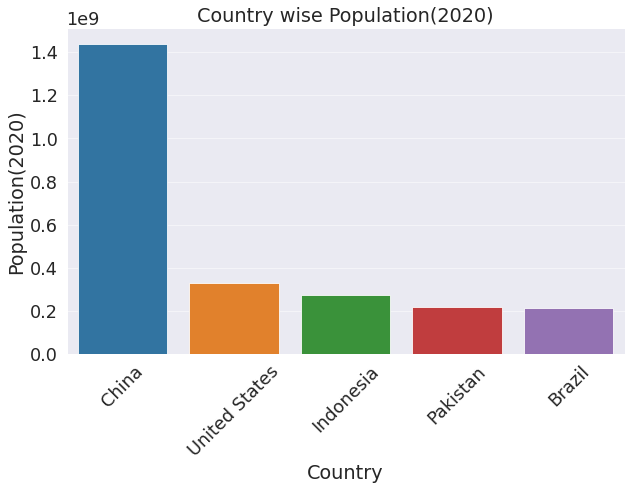

In [34]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_palette("tab10")
sns.set_style('darkgrid')
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 0.5})
sns.barplot(data=df_top_5, x='country',y='population(2020)')
plt.title('Country wise Population(2020)')
plt.xlabel('Country') 
plt.ylabel('Population(2020)') 
plt.xticks(rotation=45)
plt.show()

C. Create a Line plot of 'Country vs Land_Area_Km² for top 5 countries by population' and apply the Following customization to the plot.
- Make the Figure size (15,8)
- Make line/markers color 'indigo'
- Make line width as 2 and line style as '-.'
- Add label as Land_Area_Km²
- Add markers as 'o' with markersize = 10 
- Add a title to the Plot with fontsize = 15 and color = purple
- Add X-Label as Country & Y-Label as Land_Area_Km²
- Add Grid to the plot using grid() function
- Show the legend for the plot using legend() funct
- Also Show the plot

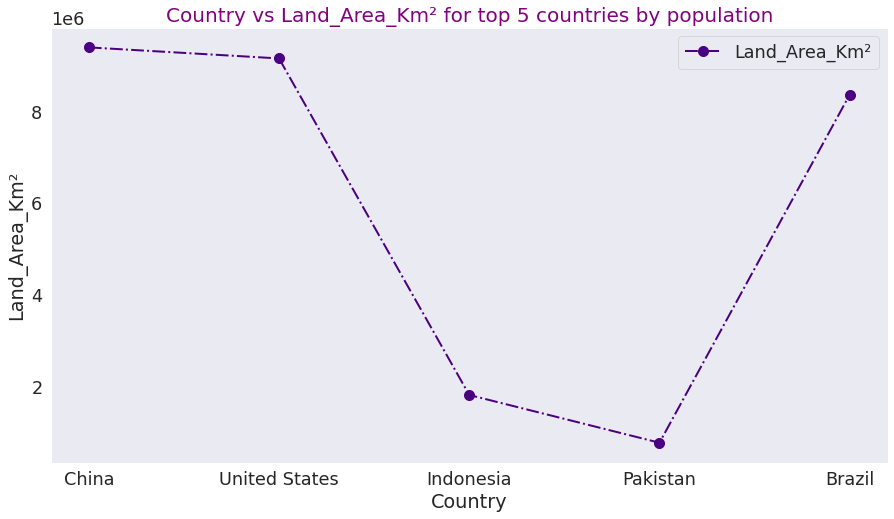

In [36]:
plt.figure(figsize=(15,8))
plt.plot(df_top_5['country'],df_top_5['land_area_km²'],color='indigo',marker='o',
         label='Land_Area_Km²',markersize=10,lw=2,linestyle='-.')
plt.xlabel('Country') 
plt.ylabel('Land_Area_Km²') 
plt.legend()
plt.title('Country vs Land_Area_Km² for top 5 countries by population',fontsize=20,color='purple') 
plt.grid()
plt.show()